In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [38]:
# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

In [39]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [40]:
# Merge the mouse_metadata and study_results DataFrames
merged_df = pd.merge(mouse_metadata, study_results, how='right', on='Mouse ID')

# Re order columns
column_order = ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)' ]
merged_df = merged_df.reindex(columns=column_order)
display(merged_df)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [41]:
# Check for the number of mice i.e. the number of different Mouse IDs

print("Number of mice:", merged_df["Mouse ID"].nunique())

Number of mice: 249


In [42]:
# Check for duplicate mouse ID and timepoint - and give location

duplicate_ids = merged_df.loc[merged_df.duplicated(subset=["Mouse ID", "Timepoint"]),'Mouse ID'].unique()
duplicate_ids

array(['g989'], dtype=object)

In [43]:
# Drop duplicates based on mouse ID
clean_df = merged_df[merged_df['Mouse ID'].isin(duplicate_ids)==False]

# Re order columns
column_order = ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)' ]
cleaned_data = clean_df.reindex(columns=column_order)

cleaned_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [44]:
# Display the updated number of mice IDs

print("Number of mice after cleaning:", cleaned_data["Mouse ID"].nunique())

Number of mice after cleaning: 248


In [45]:
# Calculate summary statistics using groupby

# Group by 'Drug Regimen'
grouped = cleaned_data.groupby('Drug Regimen')

# Calculate mean tumor volume for each drug regimen
mean_tumor_volume = grouped['Tumor Volume (mm3)'].mean()

# Calculate median tumor volume for each drug regimen
median_tumor_volume = grouped['Tumor Volume (mm3)'].median()

# Calculate variance of tumor volume for each drug regimen
variance_tumor_volume = grouped['Tumor Volume (mm3)'].var()

# Calculate standard deviation of tumor volume for each drug regimen
std_tumor_volume = grouped['Tumor Volume (mm3)'].std()

# Calculate standard error of the mean (SEM) of tumor volume for each drug regimen
sem_tumor_volume = grouped['Tumor Volume (mm3)'].sem()

# Create a summary DataFrame
summary_stats = pd.DataFrame({
    'Mean Tumour Volume': mean_tumor_volume,
    'Median Tumour Volume': median_tumor_volume,
    'Tumour Volume Variance': variance_tumor_volume,
    'Tumour Volume Std. Dev.': std_tumor_volume,
    'Tumour Volume Std. Err.': sem_tumor_volume
})

# Display the summary DataFrame
display(summary_stats)


,Mean Tumour Volume,Median Tumour Volume,Tumour Volume Variance,Tumour Volume Std. Dev.,Tumour Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [46]:
# Calculate summary statistics using agg
summary_stats = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# Display summary statistics
display(summary_stats)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

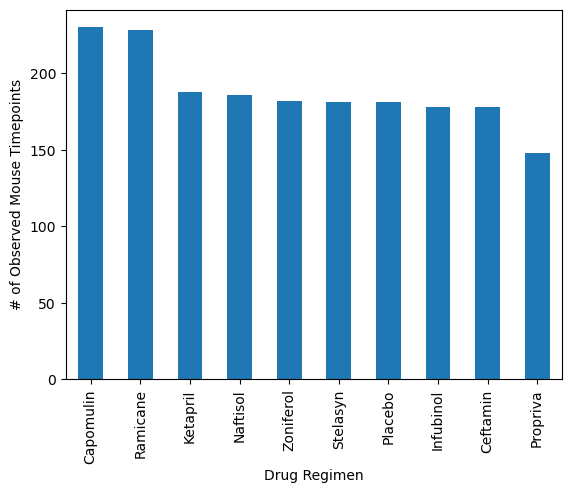

In [47]:
# Bar chart with Pandas

bar_pandas = cleaned_data["Drug Regimen"].value_counts().plot(kind="bar")
plt.ylabel("# of Observed Mouse Timepoints")

display(bar_pandas)

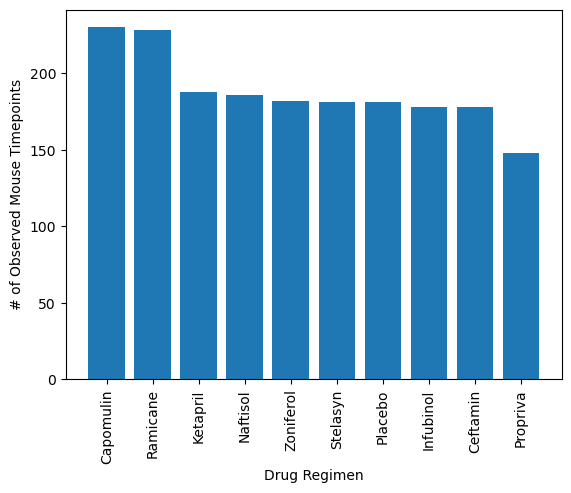

In [48]:
# Bar chart with Matplotlib

bar_matplotlib = cleaned_data["Drug Regimen"].value_counts()
plt.bar(bar_matplotlib.index, bar_matplotlib.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='Sex'>

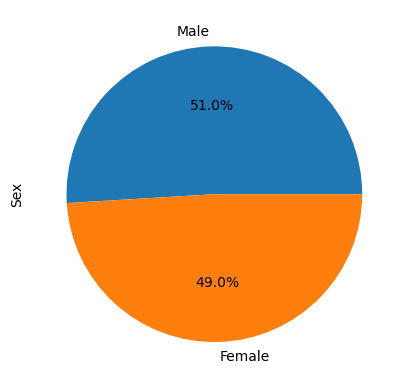

In [49]:
# Pie chart with Pandas

pie_pandas = cleaned_data["Sex"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.ylabel("Sex")
display(pie_pandas)

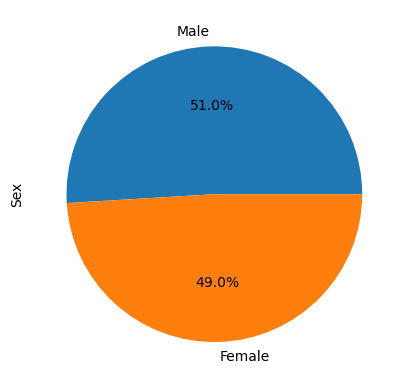

In [50]:
# Pie chart with Matplotlib

pie_matplotlib = cleaned_data["Sex"].value_counts()
plt.pie(pie_matplotlib, labels=pie_matplotlib.index, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Get the last timepoint for each mouse
last_timepoint = cleaned_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

final_tumor_volume = pd.merge(last_timepoint, cleaned_data, on=["Mouse ID", "Timepoint"])

# Create a list of the four most promising treatment regimens
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Empty list to hold tumor volume data
tumor_volume_data = []

# Loop through each treatment and append final tumor volume data
for treatment in treatment_list:
    tumor_volume_data.append(final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"])

# Determine outliers
for i, treatment in enumerate(tumor_volume_data):
    quartiles = treatment.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    outliers = treatment[(treatment < lower_bound) | (treatment > upper_bound)]
    print(f"Outliers for {treatment_list[i]}: {outliers}")

Outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


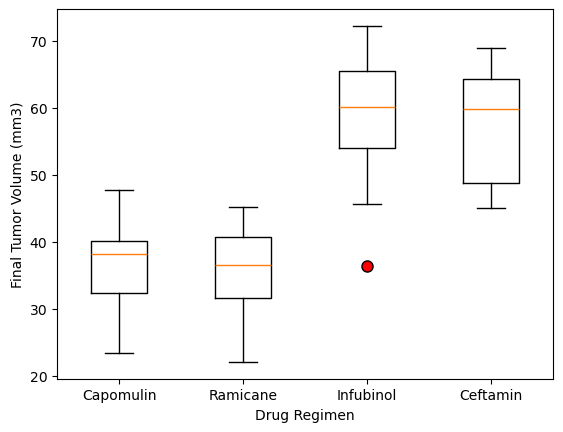

In [52]:
# Create Box Plot

plt.boxplot(tumor_volume_data, labels=treatment_list, flierprops=dict(marker='o', markerfacecolor='r', markersize=8))
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

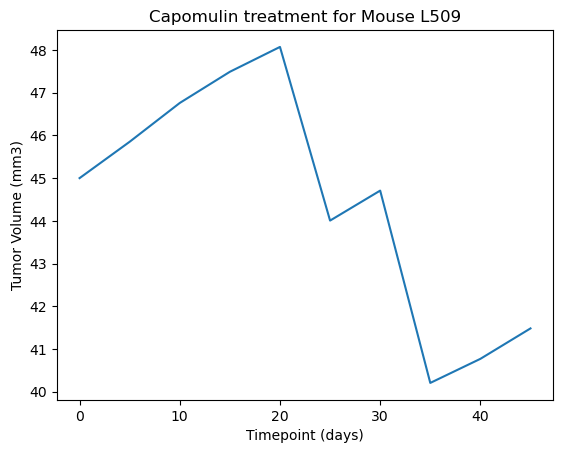

In [53]:
# Line plot for one mouse treated with Capomulin

capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]
one_mouse = capomulin_data[capomulin_data["Mouse ID"] == "l509"]
plt.plot(one_mouse["Timepoint"], one_mouse["Tumor Volume (mm3)"])
plt.title("Capomulin treatment for Mouse L509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

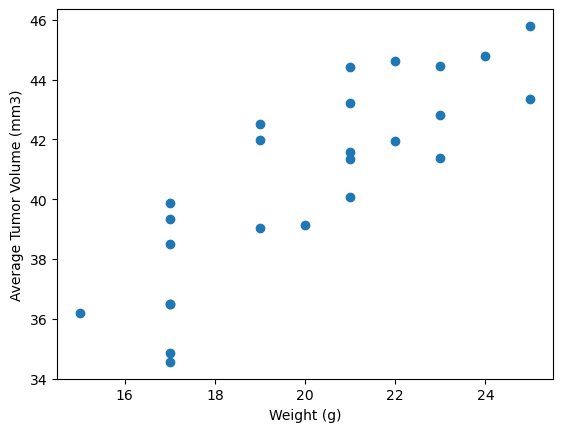

In [54]:
# Scatter plot for Capomulin regimen

average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()
plt.scatter(mouse_weight, average_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

In [55]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate correlation coefficient and linear regression model
correlation = st.pearsonr(mouse_weight, average_tumor_volume)
print(f"Correlation between mouse weight and average tumor volume: {correlation[0]}")

Correlation between mouse weight and average tumor volume: 0.841936342469472


Text(0, 0.5, 'Average Tumour Volume (mm3)')

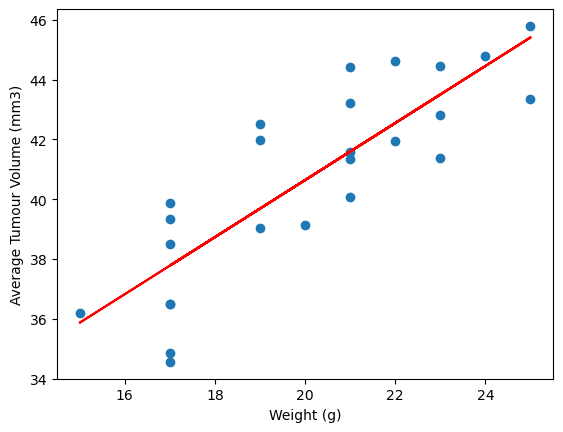

In [56]:
# Plot Linear Regression

from scipy.stats import linregress

slope, intercept, rvalue, pvalue, stderr = linregress(mouse_weight, average_tumor_volume)
regression_values = mouse_weight * slope + intercept
plt.scatter(mouse_weight, average_tumor_volume)
plt.plot(mouse_weight, regression_values, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumour Volume (mm3)")